In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Basics

### New matrix

In [2]:
new_array = np.array([[0, 1],
                      [10, 3],
                      [400, 23]])

In [3]:
#1D
list_num = [1, 2, 43, 5]
another_array = np.array(list_num)     #можно создать матрицу, передав ей список

#2D
list_num2 = [[1, 2], [43, 5]]
yet_another_array = np.array(list_num2) #можно создать матрицу, передав ей список списков 

In [35]:
#shape
print(another_array.shape, yet_another_array.shape)

(4,) (2, 2)


#### Special matrixes

In [6]:
empt_mtrx = np.empty([2,3])      #создает матрицу с случайным наполением

In [7]:
zeros_mtrx = np.zeros([2,3])     #создает матрицу заполниную нулями 

In [8]:
ones_mtrx = np.ones([2,3])       #создает матрицу заполниную единицами

#### Properties

In [3]:
new_array.shape   #(rows, columns)

(3, 2)

In [4]:
new_array.dtype   

dtype('int32')

#### Indexing
- Положительное и отрицательное индексирование
- 2D индексирование. Вызов целого ряда

In [36]:
#Одномерное и многомерное индексирование
print(another_array)
print(yet_another_array, '\n')

print(another_array[0], another_array[2], '\n')   #обычно как и дургих массивов

print(yet_another_array[0][1], yet_another_array[1][1])  #для 2D, сначала строку, потом стобец. Все как в линале
print(yet_another_array[0, 1], yet_another_array[1, 1])  #аналогично nD-array можно вызвать через список

[ 1  2 43  5]
[[ 1  2]
 [43  5]] 

1 43 

2 5
2 5


In [37]:
#Вызвать целый ряд
print(yet_another_array[0, ])   #надо оставить пустым соответствующий индекс 

[1 2]


In [29]:
print(another_array[-1])   #отрицательные индексы ведут отсчет с конца

5


#### Slicing 
- Работает как для положительнного, так и для отрицательного индексирования (от конца)

In [31]:
# 1D slicing [start:stop]    //stop не включен
print(another_array[1:3])
print(another_array[:])     #целиком

[ 2 43]
[ 1  2 43  5]


In [8]:
# 2D slicing
data = np.array([[11, 22, 33],
              [44, 55, 66],
              [77, 88, 99]])
# separate data
X, y = data[:, :-1], data[:, -1]
also = data[:2]
print(X)                   #все ряды, и все столбцы кроме послднего
print('\n', y)                   #все ряды, только последний столбец
print('\n', also)          #первые 2 строки

[[11 22]
 [44 55]
 [77 88]]

 [33 66 99]

 [[11 22 33]
 [44 55 66]]


- `data[:, :]` первое двоеточие - это срез по **рядам**, а второе двоеточие - срез по **столбцам** т.е. запись `data[:-1,0]` -выедет все ряды и только 2й стобец (т.к. счет с 0). 
- При этом, срез возвращает новый array, т.е. `data[:-1,0]` вренет соотв. обрезанный стобец

In [20]:
data[:-1,0]  # выведет все строки от 1й до предпоследней, и только 1й стобец

array([11, 44])

In [30]:
# train and test sets
data = np.array([
[11, 22, 33],
[44, 55, 66],
[77, 88, 99]])
# separate data
split = 2
train,test = data[:split,:],data[split:,:]   
print(train)   # train set первые две строки
print(test)    # test set последняя строка

[[11 22 33]
 [44 55 66]]
[[77 88 99]]


#### Broadcasting
Numpy может сам достроить векторы до нужного размера, если арифметика для них невозможна. 

In [50]:
a = np.array([1, 2, 3, 4])
b = 2  # достроит до [2,2,2,2]
print(a+b)

a = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8]])
b = 2  # достроит до [[2,2,2,2], [2,2,2,2]]
print(a+b)

a = np.array([[1, 2, 3],
           [1, 2, 3]])
b = np.array([1, 2, 3])   # достроит до [[1, 2, 3], [1, 2, 3]]
print(a+b)

[3 4 5 6]
[[ 3  4  5  6]
 [ 7  8  9 10]]
[[2 4 6]
 [2 4 6]]


### Stack and concatenate

In [14]:
# 2D
mtrx1 = np.array([1, 2, 3])
mtrx2 = np.array([4, 5, 6])

vmtrx = np.vstack((mtrx1, mtrx2))  #vertical stack (добавляет как следующий ряды)
hmtrx = np.hstack((mtrx1, mtrx2))  #horizontal stack/concatenate (то есть добавляет в ряд)

print(vmtrx)
print(hmtrx)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [15]:
# 3D
mtrx1 = np.array([[1, 2, 3],
                 [4, 5, 6]])
mtrx2 = np.array([[7, 8, 9],
                 [10, 11, 12]])

vmtrx = np.vstack((mtrx1, mtrx2))  #vertical stack (добавляет как следующий ряды)
hmtrx = np.hstack((mtrx1, mtrx2))  #horizontal stack/concatenate (то есть добавляет в ряд) !для соответствующих рядов

print(vmtrx)
print(hmtrx)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [23]:
# 2D и 3D
mtrx1 = np.array([1, 2, 3])
mtrx2 = np.array([[7, 8, 9],
                 [10, 11, 12]])
vmtrx = np.vstack((mtrx1, mtrx2))  # vertical stack (добавляет как следующий ряды): все сработает хорошо
print(vmtrx)
hmtrx = np.hstack((mtrx1, mtrx2))  # horizontal stack будет ругаться, т.к. не сходятся размерности 
print(hmtrx)

[[ 1  2  3]
 [ 7  8  9]
 [10 11 12]]


ValueError: all the input arrays must have same number of dimensions

`np.r_[]` - класс, который совмещает несколько матриц в одну: *одну под другой*

In [13]:
a = np.array([[1, 3,  1],
     [1, 1, -1],
     [3, 11, 6]])
c = np.r_[a, np.zeros((3,3))]
print(c)

[[ 1.  3.  1.]
 [ 1.  1. -1.]
 [ 3. 11.  6.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


`np.r_[]` - класс, который совмещает несколько матриц в одну: *одну рядом с другой*

In [14]:
a = np.array([[1, 3,  1],
     [1, 1, -1],
     [3, 11, 6]])
c = np.c_[a, np.zeros((3,3))]
print(c)

[[ 1.  3.  1.  0.  0.  0.]
 [ 1.  1. -1.  0.  0.  0.]
 [ 3. 11.  6.  0.  0.  0.]]


### reshape and ravel

#### np.ravel()

In [18]:
new_array = np.array([[0, 1],
                      [10, 3],
                      [400, 23]])
print(new_array.ravel())           # order='C' - default
print(new_array.ravel(order='C'))
print(new_array.ravel(order='F'))
print(new_array.ravel(order='A'))

[  0   1  10   3 400  23]
[  0   1  10   3 400  23]
[  0  10 400   1   3  23]
[  0   1  10   3 400  23]


`np.ravel(a, order='C')` - "выпрямляет матрицу" т.е. из n-D, делает ее 1-D (строкой)   
- **a** - матрица для "выпрямления"
- **order** 
    - $C-[row1, row2, ..]$, 
    - $F-[column1, column2, ..]$
    - $A-?$ вроде тоже $[row1, row2, ..]$    

#### np.reshape() 

In [34]:
reshaped_array = new_array.reshape((6, 1))
print(reshaped_array, '\n')
print(reshaped_array.reshape((3, 2)), '\n')
print(reshaped_array.reshape((2, 3)))

[[  0]
 [  1]
 [ 10]
 [  3]
 [400]
 [ 23]] 

[[  0   1]
 [ 10   3]
 [400  23]] 

[[  0   1  10]
 [  3 400  23]]


` numpy.reshape(a, newshape, order='C')`  

- $a$ - Array to be reshaped (или, если вызыватеся как метод, то это будет array на котором reshape вызван.   
- $newshape$ - int or tuple of ints. $(rows, columns)$  The new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.   

Т.е. он идет по old row 1 и считает индекc, дошел до конца new row 2 (т.е. до послднего индекса) и обрезал. Если len(old row) < len(new row), то перейдет на old row 2 и продолжит считать индекс в строке.

**Changing dimetions for algorithms**  
Иногда надо явно передать матрицу определнной размероности. Так 1D array не соответсвует строке т.к. это (n,). Чтобы сделать ее  строкой в представлении numpy (т.е. (1, n)), надо `np.reshape(a, (1, n))`. Так же это нужно для транспонирования матрицы (n, 1) 

In [40]:
# Просто 1D array
data = np.array([11, 22, 33, 44, 55])
print(data.shape, data)
# Transpose (Из него сделали стобец)
data = data.reshape((data.shape[0], 1))
print(data.shape, data)
# А теперь это матрица 1х5 (т.е. технически это 2D array)
data = data.reshape((1, 5))
print(data.shape, data)

(5,) [11 22 33 44 55]
(5, 1) [[11]
 [22]
 [33]
 [44]
 [55]]
(1, 5) [[11 22 33 44 55]]


### meshgrid() и arange()

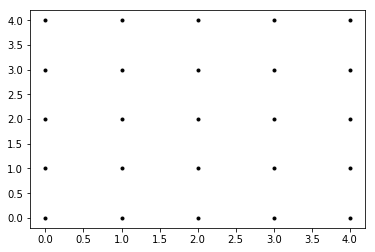

In [33]:
xvalues = np.arange(0, 5)  
yvalues = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

**arange**  
`numpy.arange([start,] stop, [step,] dtype=None)` - Return evenly spaced values within a given interval. Values are generated within the half-open interval [start, stop). Эквивалентно: `np.arange(0, 5) = np.array([0, 1, 2, 3, 4])`  

**meshgrid**  
`xx, yy = np.meshgrid(x, y)` The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values. [Тут очень хорошо про meshgrid](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)   
![meshgird_суть](https://i.stack.imgur.com/8Mbig.png)  
Так же meshgrid используют, чтобы равномерно задать распределение значений x и y на плоскости, например, чтобы задать значение функции на 2D  

## Distributions

#### np.linspace

Возвращает равномерно распределенный array

In [4]:
x = np.linspace(0, 2*np.pi, 400)

**unifirm distibution**  
`numpy.random.rand(rows, columns)` - Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
Shape: 1D, 2D (row, column), ..., nD

In [12]:
uniform_array = np.random.rand(3,2)                
print(uniform_array)

[[0.19738781 0.29337729]
 [0.46973807 0.65326816]
 [0.46123791 0.74089944]]


___

In [10]:
np.seed = 7  #ставим зерно для рандомизации
norm_array = np.random.normal(size=(100, 2))

**normal distribution**  
`np.random.normal(loc, standard deviation ,size)` - default loc = 0 - это где лежит среднее значение распределения

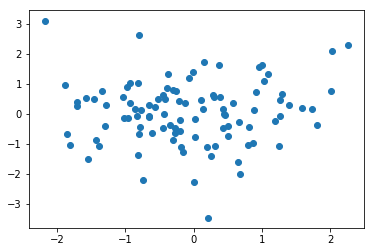

In [14]:
plt.scatter(norm_array[:, 0], norm_array[:, 1])

## Linear algebra

Реализуется через  методы `np.linalg.` 

### Basic linear algebra

#### Векторы

**Сложение, вычитание, скалярное произведение и умножение на скаляр**

In [64]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = 2
print("+:\n", a+b)
print("-:\n", a-b)
print("Умножение на скаляр:\n", a*c)

+:
 [5 7 9]
-:
 [-3 -3 -3]
Умножение на скаляр:
 [2 4 6]


**По-координатное умножение и деление**
- Умножение $[x_1*x_2, y_1*y_2, z_1*z_2]$ 
- Деление $[x_1/x_2, y_1/y_2, z_1/z_2]$ 

In [62]:
print("Покоординатное произведение:\n", a*b)
print("Покоординатное деление:\n", a/b)

Покоординатное произведение:
 [ 4 10 18]
Покоординатное деление:
 [0.25 0.4  0.5 ]


**Скалярное произведение (dot product)**

In [67]:
n = a.dot(b)
print(n)

32


**Вектороное произведение (Сross product : (a x b))**

In [68]:
n = np.cross(a, b)
print(n)

[-3  6 -3]


In [70]:
# Каждый ряд рассматривается как вектор и для них по-парно ищется cross product
x = np.array([[1,2,3], [4,5,6], [7, 8, 9]])
y = np.array([[7, 8, 9], [4,5,6], [1,2,3]])
print(np.cross(x, y))

[[ -6  12  -6]
 [  0   0   0]
 [  6 -12   6]]


**Нормы**  
- `numpy.linalg.norm(vector, norm_type)`, $L^2$ is by default 
- Пусть есть вектор $V = {a_1, a_2, a_3}$. Длинна вккторас оцениваются с помощью нормы. Среди популярных норм:
    - $L^{1} = ||V||_1 = |a_1| + |a_2| + |a_3|$                (taxicab norm)
    - $L^{2} = ||V||_2 = \sqrt{|a_1|^2 + |a_2|^2 + |a_3|^2}$   (Euclidean norm) 
    - $L^{inf} = ||V||_{inf} = max(|a_1| + |a_2| + |a_3|)$       (maximum norm, равна максимальной координате)

In [78]:
v = np.array([1,2,3])
print(np.linalg.norm(v, 1))  # L1
print(np.linalg.norm(v))     # L2, указывать не надо т.к. default

6.0
3.7416573867739413


In [77]:
from math import inf # need to import infinity object

v = np.array([1,2,3])
print(np.linalg.norm(v, inf))

3.0


#### Матрицы

**Сложение, вычитание и умножение на скаляр**

In [81]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[1, 2, 3],
              [4, 5, 6]])
с = 2
print("+:\n", A+B)
print("-:\n", A-B)
print("Скаляр:\n", A*с)

+:
 [[ 2  4  6]
 [ 8 10 12]]
-:
 [[0 0 0]
 [0 0 0]]
Скаляр:
 [[ 2  4  6]
 [ 8 10 12]]


**По-элементное умножение (Hadamard Product) и деление**

In [83]:
print("Умножение(Hadamard Product):\n", A*B)
print("Деление:\n", A/B)

Умножение(Hadamard Product):
 [[ 1  4  9]
 [16 25 36]]
Деление:
 [[1. 1. 1.]
 [1. 1. 1.]]


**Перемножение матриц и векторов**
- Через `np.dot()`
- Через `@` (в python 3.5 с страше)

In [3]:
A = np.array([[1, 2],
           [3, 4],
           [5, 6]])
B = np.array([[1, 2],
           [3, 4]])
C = np.array([[1],
              [2]])
# матрица * матрица 
print(A.dot(B))
print(A@B, "\n")
# матрица вектор
print(A.dot(C))
print(A@C)

[[ 7 10]
 [15 22]
 [23 34]]
[[ 7 10]
 [15 22]
 [23 34]] 

[[ 5]
 [11]
 [17]]
[[ 5]
 [11]
 [17]]


**Диагональная матрица**  
`np.diag(a)` - если 1)a - 1D, то создаст диагональную матрицу на ее основе. 2) Если a - матрица, то извлечет из нее диагональ в виделе 1D вектора

In [101]:
d = np.diag(A)
print(d)
D = np.diag(d)
print(D)

[ 1  4 11]
[[ 1  0  0]
 [ 0  4  0]
 [ 0  0 11]]


**Единичная матрица (identity)**   

In [102]:
I = np.identity(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Транспонирование(transpose) и Обратная(inverse)**  
- `np.T`- transpose
- `np.linalg.inv(A)` - inverse

In [2]:
A = np.array([[1,2],
              [3,4]])
print("Transpose: \n", A.T, "\n")
print("Inverse: \n", np.linalg.inv(A))

Transpose: 
 [[1 3]
 [2 4]] 

Inverse: 
 [[-2.   1. ]
 [ 1.5 -0.5]]


Хотя $A*A^{-1} = I$, из-за плавающей точки, значения не будут строго равны 0 и 1

In [112]:
print(A.dot(np.linalg.inv(A)))

[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


**Пример ортогональной матрицы (Q)**  
Для ортогональной матрицы верно: $Q*Q^T = I = Q*Q^{-1}$

In [111]:
Q = np.array([[0,0,0,1],
             [0,0,1,0], 
             [1,0,0,0],
             [0,1,0,0]])
print(Q.dot(Q.T), "\n")
print(Q.dot(np.linalg.inv(Q)))

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**Trace (tr(A)), determinant (det(A)) and rank(A)**

In [5]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7,8,9]])
print(np.trace(A))
print(np.linalg.det(A))
print(np.linalg.matrix_rank(A))

15
-9.51619735392994e-16
2


#### Sparse matrixes

**Sparce matrixes** - матрицы, в которых много нулей. Параметр оценки: $sparsity = \frac{num zeros elements}{total num elements}$  
**Dense matrixes** - матрицы с малым кол-во нулей.  
Важно их разделять т.к. операции над матрицами обычно $O(n^3)$ от кол-ва элементов. Поэтому очень больщие sparese matrixes удобно сжать в более компактый формат.  
___

**Compressed Sparse Row Format (CSR)** - sparece matrix форматируется в три 1D матрицы (а точнее вектора):  
1. A: array A contains all the nonzero elements (size = num of nonzero elements, путь будет m) 
2. IA: array IA is of length m + 1. It is defined by this recursive definition:
    1. IA[0] = 0
    2. IA[i] = IA[i-1] + (кол-во ненулевых элементов в (i-1)ом ряду)
    3. IA[m+1] = total number of nonzero elements
3. JA: array JA contains the column index of each element of A  
потом эти три массива последовательно "разматываюстя" в несжатую матрицу. Пример на [wiki](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format))

In [10]:
# need scipy to work w/ CSR
from scipy.sparse import csr_matrix

A = np.array([
[1, 0, 0, 1, 0, 0],
[0, 0, 2, 0, 7, 1],
[0, 0, 0, 2, 0, 10]])
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S, "\n")
# reconstruct back to dense matrix
B = S.todense()
print(B)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 4)	7
  (1, 5)	1
  (2, 3)	2
  (2, 5)	10 

[[ 1  0  0  1  0  0]
 [ 0  0  2  0  7  1]
 [ 0  0  0  2  0 10]]


Тут это реализованно через словари: {nonzero element: (row, col)}

#### Тензоры

**Тензор** - (упрощенное) многомерная матрица. Вектор - тензор 1го порядка, матрица (2D) - 2го. Матиматика похожа: 

In [14]:
A = np.array([
[[1,2,3], [4,5,6], [7,8,9]],
[[11,12,13], [14,15,16], [17,18,19]],
[[21,22,23], [24,25,26], [27,28,29]]])
B = np.array([
[[1,2,3], [4,5,6], [7,8,9]],
[[11,12,13], [14,15,16], [17,18,19]],
[[21,22,23], [24,25,26], [27,28,29]]])
c = 2
print("+:\n", A+B)
print("-:\n", A-B)
print("Умножение на скаляр:\n", A*c)
print("Поэлементое умножение(Hadamard Product):\n", A*B)
print("Поэлементое деление:\n", A/B)

+:
 [[[ 2  4  6]
  [ 8 10 12]
  [14 16 18]]

 [[22 24 26]
  [28 30 32]
  [34 36 38]]

 [[42 44 46]
  [48 50 52]
  [54 56 58]]]
-:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
Умножение на скаляр:
 [[[ 2  4  6]
  [ 8 10 12]
  [14 16 18]]

 [[22 24 26]
  [28 30 32]
  [34 36 38]]

 [[42 44 46]
  [48 50 52]
  [54 56 58]]]
Поэлементое умножение(Hadamard Product):
 [[[  1   4   9]
  [ 16  25  36]
  [ 49  64  81]]

 [[121 144 169]
  [196 225 256]
  [289 324 361]]

 [[441 484 529]
  [576 625 676]
  [729 784 841]]]
Поэлементое деление:
 [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


**Tensorproduct**  
Обозначается и считается следующим образом:
![Tensorproduct](https://wikimedia.org/api/rest_v1/media/math/render/svg/5897f64a9e62966f62077cdafad5be0fca0c8c1c)
- Аналогичным образом может быть выполнен для векторов и матриц
- Получейнный тезвор будет размера dim(A)+dim(B)

In [17]:
C = np.tensordot(A, B, axes=0)
print(C.shape, "\n", C)

(3, 3, 3, 3, 3, 3) 
 [[[[[[  1   2   3]
     [  4   5   6]
     [  7   8   9]]

    [[ 11  12  13]
     [ 14  15  16]
     [ 17  18  19]]

    [[ 21  22  23]
     [ 24  25  26]
     [ 27  28  29]]]


   [[[  2   4   6]
     [  8  10  12]
     [ 14  16  18]]

    [[ 22  24  26]
     [ 28  30  32]
     [ 34  36  38]]

    [[ 42  44  46]
     [ 48  50  52]
     [ 54  56  58]]]


   [[[  3   6   9]
     [ 12  15  18]
     [ 21  24  27]]

    [[ 33  36  39]
     [ 42  45  48]
     [ 51  54  57]]

    [[ 63  66  69]
     [ 72  75  78]
     [ 81  84  87]]]]



  [[[[  4   8  12]
     [ 16  20  24]
     [ 28  32  36]]

    [[ 44  48  52]
     [ 56  60  64]
     [ 68  72  76]]

    [[ 84  88  92]
     [ 96 100 104]
     [108 112 116]]]


   [[[  5  10  15]
     [ 20  25  30]
     [ 35  40  45]]

    [[ 55  60  65]
     [ 70  75  80]
     [ 85  90  95]]

    [[105 110 115]
     [120 125 130]
     [135 140 145]]]


   [[[  6  12  18]
     [ 24  30  36]
     [ 42  48  54]]

    [[ 66  72  78]
    

#### Ax=b

**Lower ($L$) and upper ($U$) triangular**

In [99]:
A = np.array([[1,5,7,9],
              [0,4,1,7],
              [2,-2,11,-3]])
lower = np.tril(A)
print("L:\n", lower,"\n")

upper = np.triu(A)
print("U:\n",upper)

L:
 [[ 1  0  0  0]
 [ 0  4  0  0]
 [ 2 -2 11  0]] 

U:
 [[ 1  5  7  9]
 [ 0  4  1  7]
 [ 0  0 11 -3]]


**Решение Ax=b (СЛАУ)**

In [94]:
A = np.array([[1, 3,  1],
              [1, 1, -1],
              [3, 11, 6]])
b = np.array([9, 1, 35])
print(np.linalg.solve(A, b))

[-3.00000000e+00  4.00000000e+00  5.92118946e-16]


**Factorizations**
1. PA = LU
2. A = QR
3. A = L*L.T (Cholesky)

In [8]:
#PA = LU
from scipy.linalg import lu

A = np.array([[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]])
P, L, U = lu(A)
print(P, "\n")
print(L, "\n")
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]] 

[[ 7.00000000e+00  8.00000000e+00  9.00000000e+00]
 [ 0.00000000e+00  8.57142857e-01  1.71428571e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.58603289e-16]]


In [9]:
# A = QR
from numpy.linalg import qr

Q, R = qr(A, 'complete')
print(Q)
print(R)
# reconstruct

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [13]:
# A = L*L.T (Cholesky)
from numpy.linalg import cholesky

A = np.array([[2, 1, 1],
           [1, 2, 1],
           [1, 1, 2]])
L = cholesky(A)
print(L)

[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]


**(Almost) Never solve $A^{-1}b$**  
instead solve $Ax = b$, as it's easier and faster algorithms. Most of large matrixes are sparse and can be optimised.

## Other things

**Large matrixes**  
Even $10^4x10^4$ matrix is small enough (11.5 s to slove Ax=b)

In [20]:
np.seed = 7  #ставим зерно для рандомизации
Ahuge = np.random.normal(size=(10000, 10000))
bhuge = np.random.normal(size=(10000, 1))
print(np.linalg.solve(Ahuge, bhuge))

[[ 0.60754476]
 [-0.14494203]
 [-0.11665349]
 ...
 [-0.30084624]
 [ 0.30696494]
 [ 0.76915892]]
